# Data Description

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

## File descriptions
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.


## Data fields

- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

## Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
items = pd.read_csv('/content/drive/MyDrive/Datasets/Predict_future_sales/items.csv')
shops = pd.read_csv('/content/drive/MyDrive/Datasets/Predict_future_sales/shops.csv')
sales_train = pd.read_csv('/content/drive/MyDrive/Datasets/Predict_future_sales/sales_train.csv')
item_categories = pd.read_csv('/content/drive/MyDrive/Datasets/Predict_future_sales/item_categories.csv')


test = pd.read_csv('/content/drive/MyDrive/Datasets/Predict_future_sales/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Datasets/Predict_future_sales/sample_submission.csv')

trainset_names = ['items', 'shops', 'sales_train', 'item_categories']
trainset = [items, shops, sales_train, item_categories]
testset = [test, sample_submission]

In [ ]:
sample_submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
test 

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [ ]:
for name,data in zip(trainset_names, trainset):
  print(name,':')
  print(data.info())
  print()
  print('*'*50)
  

items :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None

**************************************************
shops :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

**************************************************
sales_train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------      

## Analysis

In [ ]:
items_itemid_set = set(items['item_id'].unique())
salestrain_itemid_set = set(sales_train['item_id'].unique())
test_itemid_set = set(test['item_id'].unique())

In [ ]:
print('Total number of itemid present in sales_train but not in items:', len(salestrain_itemid_set.difference(items_itemid_set)))
print('Total number of itemid present in test but not in sales_train:', len(test_itemid_set.difference(salestrain_itemid_set)))
print('Total number of itemid present in test but not in items:', len(test_itemid_set.difference(items_itemid_set)))

Total number of itemid present in sales_train but not in items: 0
Total number of itemid present in test but not in sales_train: 363
Total number of itemid present in test but not in items: 0


In [ ]:
shops_shopid_set = set(shops['shop_id'].unique())
salestrain_shopid_set = set(sales_train['shop_id'].unique())
test_shopid_set = set(test['shop_id'].unique())

In [ ]:
print('Total number of shopid present in sales_train but not in shops:', len(salestrain_shopid_set.difference(shops_shopid_set)))
print('Total number of shopid present in test but not in sales_train:', len(test_shopid_set.difference(salestrain_shopid_set)))
print('Total number of shopid present in test but not in shops:', len(test_shopid_set.difference(shops_shopid_set)))

Total number of shopid present in sales_train but not in shops: 0
Total number of shopid present in test but not in sales_train: 0
Total number of shopid present in test but not in shops: 0


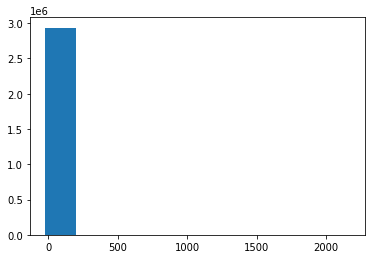

In [ ]:
plt.hist(sales_train.item_cnt_day, bins = 10)
plt.show()

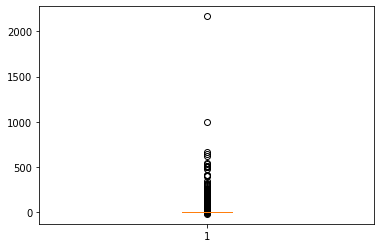

In [ ]:
plt.boxplot(sales_train.item_cnt_day)
plt.show()

In [ ]:
sales_train[sales_train.item_cnt_day > 999]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [ ]:
sales_train = sales_train[sales_train.item_cnt_day < 999]

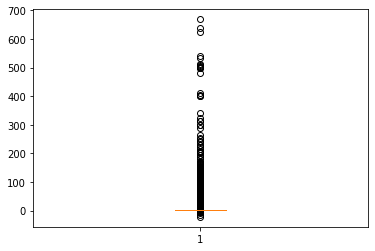

In [ ]:
plt.boxplot(sales_train.item_cnt_day)
plt.show()

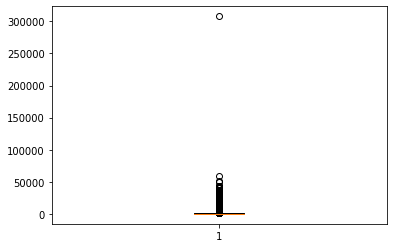

In [ ]:
plt.boxplot(sales_train.item_price)
plt.show()

In [ ]:
price = np.array(sales_train['item_price'])
price = sorted(price)

In [ ]:
pdf = price/np.sum(price)
 
cdf = np.cumsum(pdf)
cdf

array([-3.82349147e-10, -3.55584707e-10, -3.28820267e-10, ...,
        9.99859609e-01,  9.99882244e-01,  1.00000000e+00])

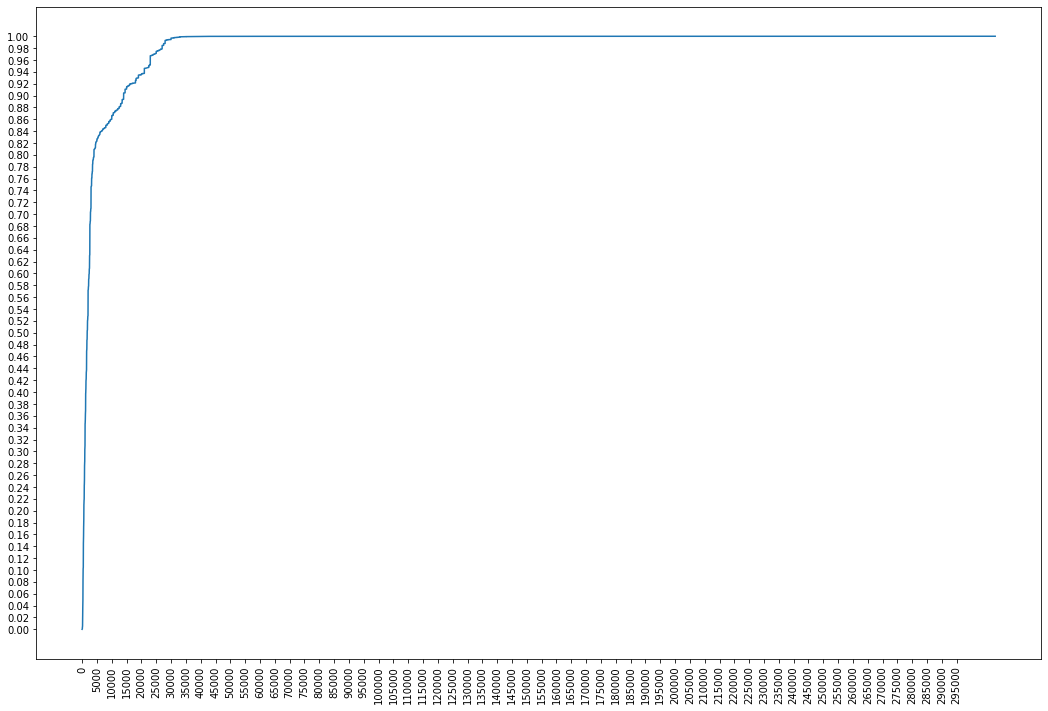

In [ ]:
plt.figure(figsize = (18,12))
plt.plot(price,cdf)
plt.yticks(np.arange(0,1.0001,0.02))
plt.xticks(np.arange(0,300000,5000), rotation = 90)
plt.show()

In [ ]:
np.quantile(sales_train.item_price, .995)

13490.0

In [ ]:
sales_train = sales_train[sales_train.item_price < 10000]

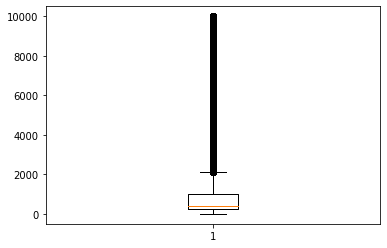

In [ ]:
plt.boxplot(sales_train.item_price)
plt.show()

## Preparing Data

In [ ]:
display(sales_train.head(2))
print(sales_train.shape)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


(2916102, 6)


In [ ]:
display(items.head(2))
print(items.shape)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


(22170, 3)


In [ ]:
train_data = sales_train.merge(items[['item_category_id','item_id']],
                              on = 'item_id',
                              how='right')
train_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,01.09.2014,20.0,54.0,0,58.0,1.0,40
1,04.04.2014,15.0,55.0,1,4490.0,1.0,76
2,02.04.2014,15.0,55.0,1,4490.0,1.0,76
3,06.07.2014,18.0,55.0,1,4490.0,1.0,76
4,04.08.2014,19.0,55.0,1,4490.0,1.0,76
...,...,...,...,...,...,...,...
2916565,02.02.2013,1.0,42.0,22168,799.0,1.0,62
2916566,17.02.2013,1.0,16.0,22168,799.0,1.0,62
2916567,08.03.2013,2.0,43.0,22168,798.5,1.0,62
2916568,13.09.2013,8.0,12.0,22168,799.0,1.0,62


In [ ]:
train_data = train_data.sort_values(by = 'date', axis = 0)

In [ ]:
train_data.isnull().sum()

date                468
date_block_num      468
shop_id             468
item_id               0
item_price          468
item_cnt_day        468
item_category_id      0
dtype: int64

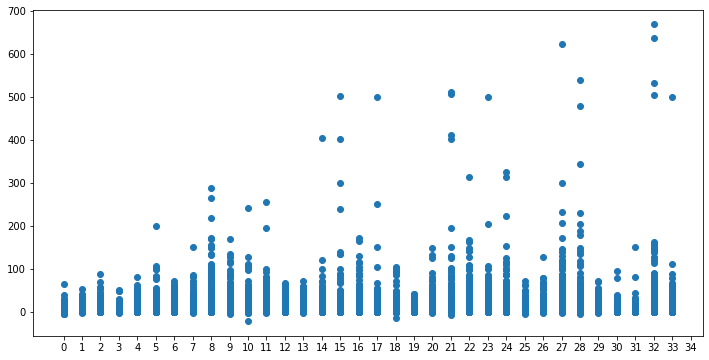

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(train_data.dropna()['date_block_num'],
         train_data.dropna()['item_cnt_day'])
plt.xticks(np.arange(0,35,1))
plt.show()

In [ ]:
#Adding new column
train_data['seasonality'] = (train_data['date_block_num'])%12
train_data.seasonality.value_counts()

0.0     301199
2.0     282466
11.0    270387
1.0     268625
7.0     247027
5.0     236234
6.0     233709
3.0     227132
9.0     225551
4.0     223758
8.0     218350
10.0    181664
Name: seasonality, dtype: int64

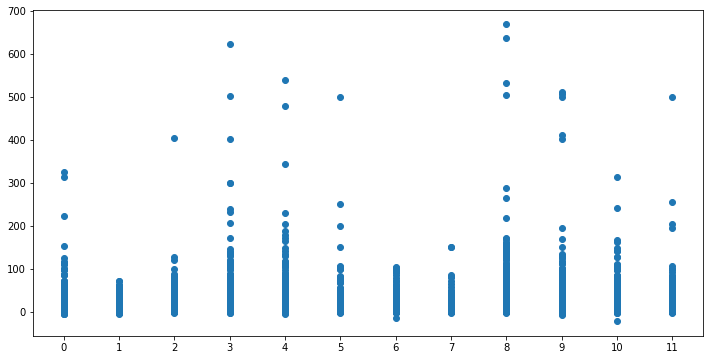

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(train_data.dropna()['seasonality'],
         train_data.dropna()['item_cnt_day'])
plt.xticks(np.arange(0,12,1))
plt.show()

## Grouping

In [ ]:
train = train_data[['seasonality', 'item_id', 'shop_id', 'item_cnt_day']]
train

,seasonality,item_id,shop_id,item_cnt_day
58977,0.0,1006,42.0,1.0
2319999,0.0,16594,13.0,1.0
2836917,0.0,21490,38.0,1.0
2096071,0.0,15060,15.0,1.0
1780380,0.0,12355,54.0,1.0
...,...,...,...,...
2886833,NaN,21974,NaN,NaN
2886834,NaN,21975,NaN,NaN
2891323,NaN,22022,NaN,NaN
2892308,NaN,22035,NaN,NaN


In [ ]:
train = train.groupby(['seasonality', 'item_id', 'shop_id'], as_index= False).agg('sum')
train

,seasonality,item_id,shop_id,item_cnt_day
0,0.0,10,54.0,1.0
1,0.0,19,25.0,1.0
2,0.0,27,1.0,1.0
3,0.0,27,2.0,1.0
4,0.0,27,10.0,1.0
...,...,...,...,...
1388705,11.0,22167,44.0,2.0
1388706,11.0,22167,45.0,1.0
1388707,11.0,22167,54.0,9.0
1388708,11.0,22167,56.0,1.0


In [ ]:
train.isnull().sum()

seasonality     0
item_id         0
shop_id         0
item_cnt_day    0
dtype: int64

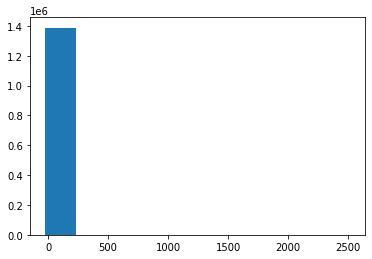

In [ ]:
plt.hist(train.item_cnt_day)
plt.show()

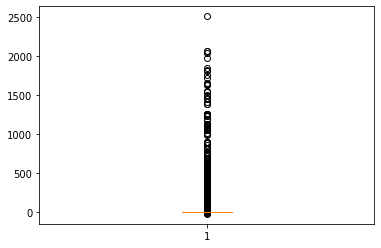

In [ ]:
plt.boxplot(train.item_cnt_day)
plt.show()

In [ ]:
count = np.array(train['item_cnt_day'])
count = sorted(count) 

In [ ]:
pdf = count/np.sum(count)
 
cdf = np.cumsum(pdf)
cdf

array([-6.08068404e-06, -9.67381552e-06, -1.13321839e-05, ...,
        9.98734941e-01,  9.99305144e-01,  1.00000000e+00])

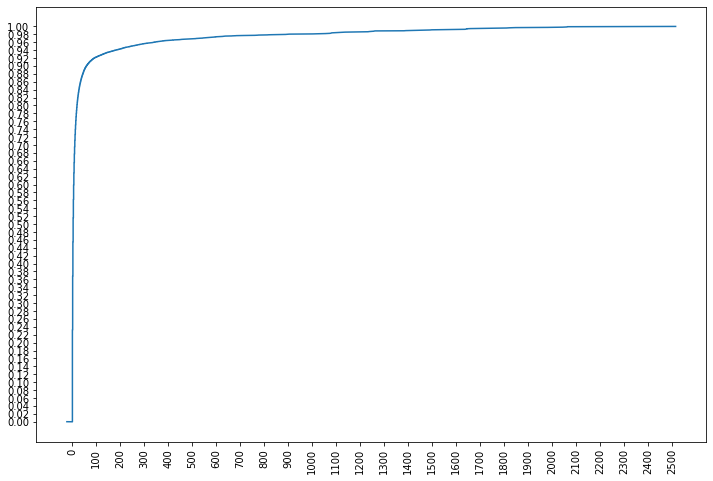

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(count,cdf)
plt.yticks(np.arange(0,1.0001,0.02))
plt.xticks(np.arange(0,2600,100), rotation = 90)
plt.show()

In [ ]:
np.quantile(train['item_cnt_day'], .99)

20.0

In [ ]:
train = train[train['item_cnt_day'] < 20]
train = train[train['item_cnt_day'] > 0]  

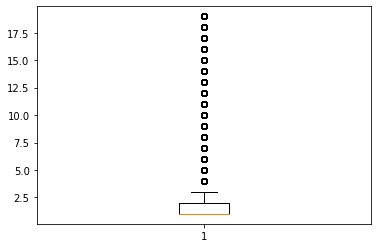

In [ ]:
plt.boxplot(train.item_cnt_day)
plt.show()

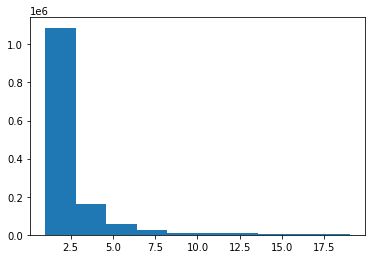

In [ ]:
plt.hist(train.item_cnt_day)
plt.show()

In [ ]:
train['item_cnt_day'] = np.log(train.item_cnt_day)

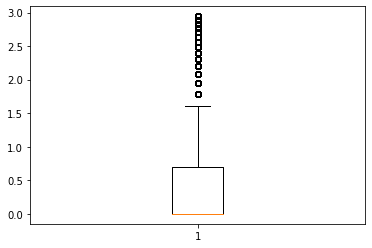

In [ ]:
plt.boxplot(train['item_cnt_day'])
plt.show()

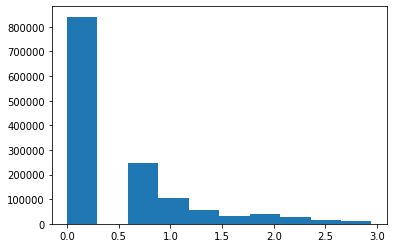

In [ ]:
plt.hist(train['item_cnt_day'])
plt.show()

In [ ]:
test['seasonality'] = 34%12
test

,ID,shop_id,item_id,seasonality
0,0,5,5037,10
1,1,5,5320,10
2,2,5,5233,10
3,3,5,5232,10
4,4,5,5268,10
...,...,...,...,...
214195,214195,45,18454,10
214196,214196,45,16188,10
214197,214197,45,15757,10
214198,214198,45,19648,10


## Data Coorrelation

In [ ]:
train.corr()

,seasonality,item_id,shop_id,item_cnt_day
seasonality,1.000000,0.000413,0.026587,0.012522
item_id,0.000413,1.000000,0.022789,-0.114633
shop_id,0.026587,0.022789,1.000000,0.018230
item_cnt_day,0.012522,-0.114633,0.018230,1.000000


## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
X = train.drop('item_cnt_day', axis =1)
Y = train['item_cnt_day']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(959882, 3)
(959882,)
(411378, 3)
(411378,)


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = model.predict(X_train)

In [ ]:
mse = mean_squared_error(Y_train,pred)
mse

0.43190681358641697

In [ ]:
rmse = mse**.5
rmse

0.6571961758762881

In [ ]:
dmodel = DecisionTreeRegressor(max_depth = 4,)
dmodel.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
pred = dmodel.predict(X_train)

In [ ]:
mse = mean_squared_error(Y_train,pred)
mse

0.4194265656600396

In [ ]:
pred = dmodel.predict(X_test)
 
 
mse = mean_squared_error(Y_test,pred)
mse

0.419942382732117

In [ ]:
rmse = mse**.5
rmse

0.6480296156288823

# Submission

In [ ]:
test.head()

,ID,shop_id,item_id,seasonality
0,0,5,5037,10
1,1,5,5320,10
2,2,5,5233,10
3,3,5,5232,10
4,4,5,5268,10


In [ ]:
predictions = dmodel.predict(test.drop('ID', axis=1))
predictions

array([0.52234187, 0.52234187, 0.52234187, ..., 0.29773328, 0.29773328,
       0.42935262])

In [ ]:
predictions = np.exp(predictions)
predictions

array([1.68597136, 1.68597136, 1.68597136, ..., 1.34680251, 1.34680251,
       1.53626266])

In [ ]:
test['item_cnt_month'] = predictions
test

,ID,shop_id,item_id,seasonality,item_cnt_month
0,0,5,5037,10,1.685971
1,1,5,5320,10,1.685971
2,2,5,5233,10,1.685971
3,3,5,5232,10,1.685971
4,4,5,5268,10,1.685971
...,...,...,...,...,...
214195,214195,45,18454,10,1.346803
214196,214196,45,16188,10,1.346803
214197,214197,45,15757,10,1.346803
214198,214198,45,19648,10,1.346803


In [ ]:
submission = test[['ID', 'item_cnt_month']]
submission

,ID,item_cnt_month
0,0,1.685971
1,1,1.685971
2,2,1.685971
3,3,1.685971
4,4,1.685971
...,...,...
214195,214195,1.346803
214196,214196,1.346803
214197,214197,1.346803
214198,214198,1.346803


In [ ]:
submission.to_csv('submission.csv', index = False)

# THE END